In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils

In [3]:
img_orig = cv2.imread(r'C:\Users\manab\OneDrive\Desktop\Project\Document Scanner\images\03.jpg')

In [5]:
cv2.namedWindow('original', cv2.WINDOW_NORMAL)
cv2.imshow('original',img_orig)
cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
print(img_orig.shape)

(1600, 1200, 3)


In [7]:
def resizer(image, width=500):
  # get width and height
  h,w,c = image.shape

  height = int((h/w)*width)
  size = (width,height)
  image = cv2.resize(image,size)

  return image,size

In [9]:
img_re,size=resizer(img_orig)
flag = 0
print(img_re.shape)
cv2.imshow('original',img_re)
cv2.waitKey()
cv2.destroyAllWindows()

(666, 500, 3)


In [10]:
detail = cv2.detailEnhance(img_re, sigma_s = 20, sigma_r = 0.15)#Enhance
gray = cv2.cvtColor(detail,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),0)
# edge detect
edge_image = cv2.Canny(blur,75,200)
# morphological transform
kernel = np.ones((5,5), np.uint8)
dilate = cv2.dilate(edge_image, kernel,iterations=1)
closing = cv2.morphologyEx(dilate,cv2.MORPH_CLOSE,kernel)

# find the contours
contours, hire = cv2.findContours(closing,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

contours = sorted(contours, key = cv2.contourArea, reverse = True)
for contour in contours:
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02*peri, True)
    
    if len(approx)==4:
        four_points = np.squeeze(approx)
        break
if flag == 0:    
  cv2.drawContours(img_re,[four_points],-1,(0,0,255),3)
  flag = 1 

# find four points for original image
multiplier = img_orig.shape[1]/size[0]
four_points_orig = four_points*multiplier
four_points_orig = four_points_orig.astype(int)
# cv2.imshow('resize_image',img_re)
# cv2.imshow('closing',closing)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [11]:
print(four_points_orig)
print(four_points)

[[ 732  324]
 [ 199  974]
 [ 597 1296]
 [1118  640]]
[[305 135]
 [ 83 406]
 [249 540]
 [466 267]]


In [12]:
from imutils.perspective import four_point_transform

In [13]:
wrap_image = four_point_transform(img_orig,four_points_orig)
wrap_image2 = four_point_transform(img_re,four_points)

In [14]:
cv2.imshow('wrap',wrap_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Document Scanning Function

In [19]:
def documnet_scanner(image):
    img_re,size=resizer(image)
    flag = 0

    detail = cv2.detailEnhance(img_re, sigma_s = 20, sigma_r = 0.15)#Enhance
    gray = cv2.cvtColor(detail,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    # edge detect
    edge_image = cv2.Canny(blur,75,200)
    # morphological transform
    kernel = np.ones((5,5), np.uint8)
    dilate = cv2.dilate(edge_image, kernel,iterations=1)
    closing = cv2.morphologyEx(dilate,cv2.MORPH_CLOSE,kernel)

    # find the contours
    contours, hire = cv2.findContours(closing,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for contour in contours:
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02*peri, True)
        
        if len(approx)==4:
            four_points = np.squeeze(approx)
            break
    if flag == 0:    
      cv2.drawContours(img_re,[four_points],-1,(0,0,255),3)
      flag = 1 

    # find four points for original image
    multiplier = image.shape[1]/size[0]
    four_points_orig = four_points*multiplier
    four_points_orig = four_points_orig.astype(int)

    wrap_image = four_point_transform(image,four_points_orig)

    return wrap_image, four_points_orig, img_re, closing

In [39]:
img = cv2.imread(r'C:\Users\manab\OneDrive\Desktop\Project\Document Scanner\images\03.jpg')

wraping,points, cnt_img,edge_img=documnet_scanner(img)

In [40]:
cv2.imshow('original Image', img)
cv2.imshow('resize', cnt_img)
cv2.imshow('resize1', edge_img)
cv2.imshow('Wraping', wraping)
cv2.waitKey(0)
cv2.destroyAllWindows()

Magic Color

In [41]:
def apply_brightness_contrast(input_img, brightness = 0, contrast = 0):
  if brightness!=0:
     if brightness>0:
        shadow = brightness
        highlight = 255
     else: 
        shadow = 0
        highlight = 255+brightness
     alpha_b = (highlight - shadow)/255
     gamma_b = shadow

     buf = cv2.addWeighted(input_img,alpha_b,input_img, 0, gamma_b) 
  else:   
    buf = input_img.copy()

  if contrast != 0:
     f = 131*(contrast+127)/(127*(131-contrast))
     alpha_c = f
     gamma_c = 127*(1-f)

     buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

  return buf   

In [47]:
rgb = cv2.cvtColor(wraping,cv2.COLOR_BGR2RGB)
magic_image = apply_brightness_contrast(rgb,120,0)
magic_image_c1 = apply_brightness_contrast(rgb,0,40)
magic_image_c2 = apply_brightness_contrast(rgb,50,40)

In [43]:
cv2.imshow('magic image', magic_image)
cv2.imshow('wrap', wraping)
cv2.waitKey()
cv2.destroyAllWindows()

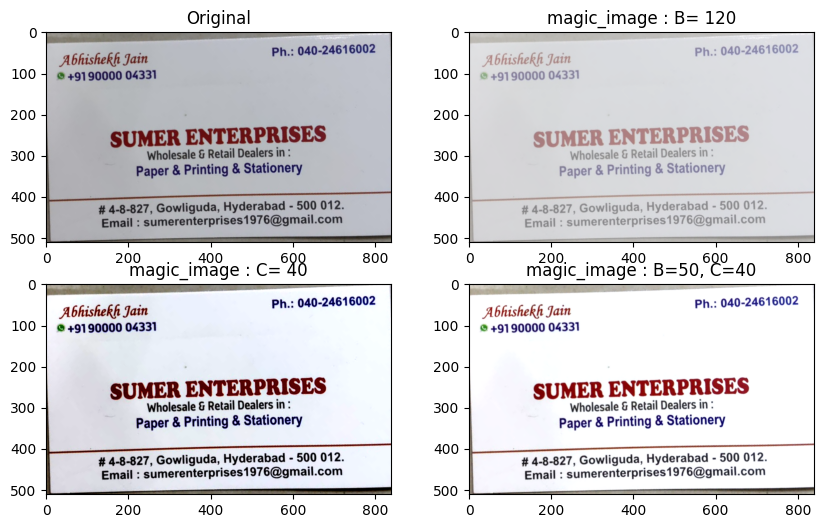

In [48]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.imshow(rgb)
plt.title('Original')

plt.subplot(2,2,2)
plt.imshow(magic_image)
plt.title('magic_image : B= 120')

plt.subplot(2,2,3)
plt.imshow(magic_image_c1)
plt.title('magic_image : C= 40')

plt.subplot(2,2,4)
plt.imshow(magic_image_c2)
plt.title('magic_image : B=50, C=40')
plt.show()

In [50]:
import Final_Prediction_doc as pred

img_bb, results = pred.get_predictions(magic_image_c2)


Extracted content: gi eerie me abhishekh jain ® 9190000 04331 ph. 040-24616002 sumer enterprises wholesale retail dealers in paper printing stationery 4-8-827, gowliguda, hyderabad - 500 012. email sumerenterprises1976@gmail.com


In [51]:
cv2.namedWindow('prediction', cv2.WINDOW_NORMAL)
cv2.imshow('predictions', img_bb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [52]:
print(results)

{'NAME': [], 'ORG': ['Retail Dealers'], 'DES': [], 'PHONE': ['040'], 'EMAIL': ['sumerenterprises1976@gmail.com'], 'WEB': []}
